In [2]:
from gym_corp_biodiv_env import *
from visualize_env import plot_grids
import numpy as np
import pprint

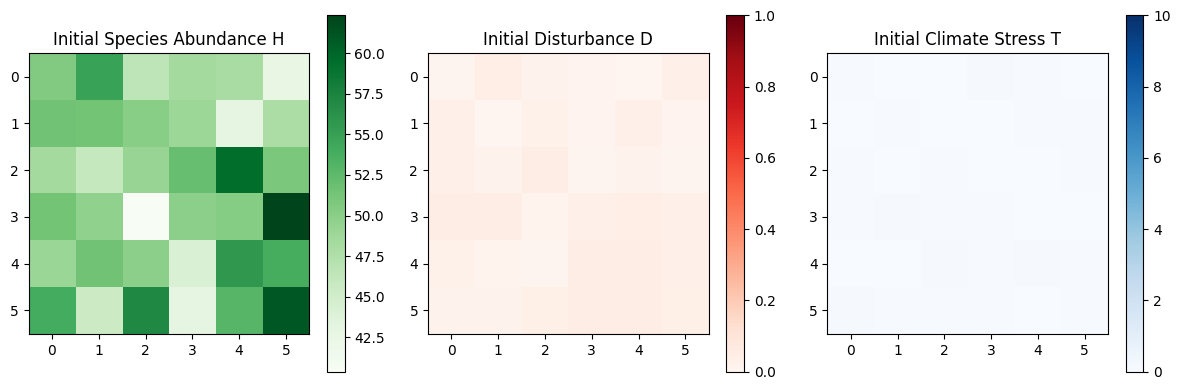

Reset obs keys:
{'D': (36,),
 'H': (36,),
 'S_perc': (3,),
 'S_true': (3,),
 'T': (36,),
 'corp_capitals': (3,),
 'investor_cash': (2,)}
Step 1 | Total H: 2058.6 | Avg D: 0.031 | Corp caps: [542.33 549.4  611.48] | S_perc: [0.773 0.77  0.752]
{'bankrupt': [False, False, False],
 'n_extinctions': 0,
 'rewards': {'corp': [41.78551258080245, 7.69074119691819, 70.5223053411637],
             'investor': [0.09043952479524899, -0.10866639101623594]}}
Step 2 | Total H: 2297.6 | Avg D: 0.036 | Corp caps: [595.67 612.15 659.38] | S_perc: [0.733 0.669 0.841]
Step 3 | Total H: 2517.5 | Avg D: 0.034 | Corp caps: [595.07 611.55 659.28] | S_perc: [0.869 0.791 0.709]
Step 4 | Total H: 2707.7 | Avg D: 0.039 | Corp caps: [592.97 732.68 793.47] | S_perc: [0.849 0.674 0.626]
Step 5 | Total H: 2868.1 | Avg D: 0.037 | Corp caps: [592.37 782.58 842.87] | S_perc: [0.892 0.683 0.763]
Step 6 | Total H: 2997.6 | Avg D: 0.038 | Corp caps: [592.27 865.8  842.77] | S_perc: [0.773 0.66  0.643]
{'bankrupt': [False, 

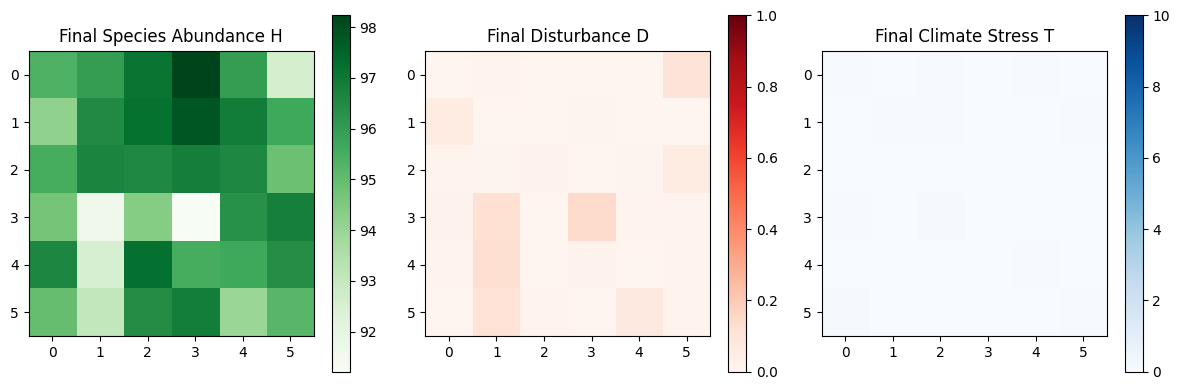

In [4]:
env = CorporateBiodiversityEnv(grid_size=6, Nc=3, Ni=2, seed=42, max_steps=50)
obs = env.reset()
plot_grids(obs['H'], obs['D'], obs['T'], env.grid_size, title_prefix="Initial")
print("Reset obs keys:")
pprint.pprint({k: (v.shape if hasattr(v, 'shape') else type(v)) for k, v in obs.items()})

for t in range(20):
    action = {
        'corp_actions': env.action_space.spaces['corp_actions'].sample(),
        'corp_targets': env.action_space.spaces['corp_targets'].sample(),
        'investor_actions': env.action_space.spaces['investor_actions'].sample(),
    }
    obs, reward, done, info = env.step(action)
    env.render()
    if t % 5 == 0:
        pprint.pprint(info)
    if done:
        break

print('Demo finished')
plot_grids(obs['H'], obs['D'], obs['T'], env.grid_size, title_prefix="Final")